## Reinforcement learning: QLearning Decision Policy
 
The <b>states</b> are previous history of stock prices, current budget, and current number of shares of a stock.

The <b>actions</b> are buy, sell, or hold (i.e. do nothing).


In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import random
from matplotlib import pyplot as plt  #for plotting stock prices 
#from yahoo_finance import Share
import pandas as pd    #data analysis tools

### get stock data

In [2]:
# microsoft 1992/7/21~2016/7/21
pd.read_csv('MSFT.csv')

,Date,Open,High,Low,Close,Adj Close,Volume
0,1992/7/21,2.187500,2.273438,2.171875,2.242188,1.489199,45907200
1,1992/7/22,2.242188,2.242188,2.171875,2.187500,1.452877,59008000
2,1992/7/23,2.179688,2.257813,2.148438,2.218750,1.473632,68441600
3,1992/7/24,2.222656,2.304688,2.218750,2.273438,1.509954,76259200
4,1992/7/27,2.273438,2.296875,2.257813,2.281250,1.515144,30512000
5,1992/7/28,2.296875,2.328125,2.273438,2.312500,1.535899,45363200
6,1992/7/29,2.328125,2.335938,2.250000,2.312500,1.535899,145273600
7,1992/7/30,2.296875,2.328125,2.281250,2.285156,1.517738,32035200
8,1992/7/31,2.296875,2.296875,2.257813,2.273438,1.509954,35312000
9,1992/8/3,2.273438,2.320313,2.250000,2.304688,1.530710,31516800


In [3]:
def get_prices(filename):
    df = pd.read_csv(filename)  #read csv file
    prices = df['Open'].as_matrix()  #選取'Open'欄位的資料，並轉成 numpy的資料形式
    return prices

In [4]:
prices = get_prices('MSFT.csv')

### plot prices

In [5]:
def plot_prices(prices):
    plt.title('Opening stock prices')
    plt.xlabel('day')
    plt.ylabel('price ($)')
    plt.plot(prices)
    plt.savefig('prices.png')
    plt.show()

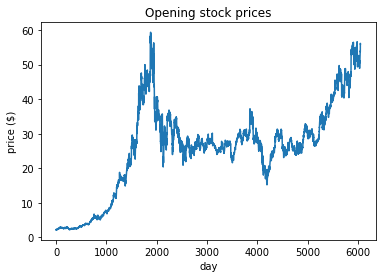

In [6]:
plot_prices(prices)

### DecisionPolicy
Define an abstract class called DecisionPolicy:

In [7]:
class DecisionPolicy:
    def select_action(self, current_state, step):
        # current state: history of stock prices, current budget, current number of shares of a stock
        # given a state, the decision policy will calculate the next action to take
        pass

    def update_q(self, state, action, reward, next_state):
        # actions: buy, sell, hold
        # improve the Q-function from a new experience of taking function
        pass

### Decision Policy: QLearning Decision Policy
let's implement our neural network approach to learn the Q-function.

### 1. Infer(s) -> a
the algorithm selects the best action (a) given a state (s) using the knowledge it has so far.

### 2. Do(s, a) -> r, s'
it does the action to find out the reward (r) as well as the next state (s’).

### 3. Learn(s, r, a, s')
Then it improves its understanding of the world using the newly acquired knowledge (s, r, a, s’).

In [28]:
class QLearningDecisionPolicy(DecisionPolicy):
    def __init__(self, actions, input_dim):
        # to keep the solution from getting “stuck” when applying the same action over and over
        # The lesser its value, the more often it will randomly explore new actions.
        self.epsilon = 0.95
        self.gamma = 0.3
        
        self.actions = actions
        output_dim = len(actions)
        
        # set the number of hidden nodes in the neural networks
        h1_dim = 20

        # define the input and output tensors
        with tf.name_scope('inputs'):
            self.x = tf.placeholder(tf.float32, [None, input_dim], name='state')
            tf.summary.scalar('state', self.x)
            self.y = tf.placeholder(tf.float32, [output_dim], name='action')
            tf.summary.scalar('action', self.y)
        
        # design the neural network architecture
        with tf.name_scope('layers'):
            with tf.name_scope('weights'):
                W1 = tf.Variable(tf.random_normal([input_dim, h1_dim]), name='weight_1')
                tf.summary.histogram('1/weight', W1)
            with tf.name_scope('biases'):
                b1 = tf.Variable(tf.constant(0.1, shape=[h1_dim]), name='bias_1')
                tf.summary.histogram('1/bias', b1)
            with tf.name_scope('relu'):
                h1 = tf.nn.relu(tf.matmul(self.x, W1) + b1, name='relu_1')
                tf.summary.histogram('1/relu', h1)
            with tf.name_scope('weights'):
                W2 = tf.Variable(tf.random_normal([h1_dim, output_dim]), name='weight_2')
                tf.summary.histogram('2/weight', W2)
            with tf.name_scope('biases'):
                b2 = tf.Variable(tf.constant(0.1, shape=[output_dim]), name='bias_2')
                tf.summary.histogram('2/bias', b2)
            # define the op to compute the utility
            with tf.name_scope('relu'):
                self.q = tf.nn.relu(tf.matmul(h1, W2) + b2, name='relu_2')
                tf.summary.histogram('2/relu', self.q)
        
        # set the loss as the square error
        with tf.name_scope('loss'):
            loss = tf.square(self.y - self.q)
            tf.summary.scalar('loss', loss)
        # use the optimizer to update model parameters to minimize the loss
        with tf.name_scope('optimizer'):
            self.train_op = tf.train.AdamOptimizer(0.001).minimize(loss)
        
        # set up the session and initialize variables
        self.sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
        merged = tf.summary.merge_all()
        writer = tf.summary.FileWriter("logs/", self.sess.graph)
        self.sess.run(tf.global_variables_initializer())

    def select_action(self, current_state, step):
        threshold = min(self.epsilon, step / 1000.)
        if random.random() < threshold:
            # Exploit best option with probability epsilon
            action_q_vals = self.sess.run(self.q, feed_dict={self.x: current_state})
            action_idx = np.argmax(action_q_vals)  
            # np.argmax: Returns the indices of the maximum values along an axis
            action = self.actions[action_idx]
        else:
            # Explore random option with probability 1 - epsilon
            action = self.actions[random.randint(0, len(self.actions) - 1)]
        return action

    def update_q(self, state, action, reward, next_state):
        # update the q-function by updating its model parameters
        action_q_vals = self.sess.run(self.q, feed_dict={self.x: state})
        next_action_q_vals = self.sess.run(self.q, feed_dict={self.x: next_state})
        next_action_idx = np.argmax(next_action_q_vals)
        current_action_idx = self.actions.index(action)
        action_q_vals[0, current_action_idx] = reward + self.gamma * next_action_q_vals[0, next_action_idx]
        action_q_vals = np.squeeze(np.asarray(action_q_vals))
        self.sess.run(self.train_op, feed_dict={self.x: state, self.y: action_q_vals})

Define a function to run a simulation of buying and selling stocks from a market:

In [29]:
# This function takes care of exploration and exploitation at each interval of time.
def run_simulation(policy, initial_budget, initial_num_stocks, prices, hist, debug=False):
    
    # initialiaze value
    budget = initial_budget
    num_stocks = initial_num_stocks
    share_value = 0
    
    transitions = list()
    
    for i in range(len(prices) - hist - 1):     # hist: previous history of stock prices
        if i % 1000 == 0:
            print('progress {:.2f}%'.format(float(100*i) / (len(prices) - hist - 1)))
            
        # the current state is a 'hist+2' dimension vector
        current_state = np.asmatrix(np.hstack((prices[i:i+hist], budget, num_stocks)))
        # np.hstack: Stack arrays in sequence horizontally (column wise)
        
        #calculate the portfolio value
        current_portfolio = budget + num_stocks * share_value
        # select an action from the current policy
        action = policy.select_action(current_state, i)
        
        share_value = float(prices[i + hist])
        
        # update budget and num_stocks based on action
        if action == 'Buy' and budget >= share_value:
            budget -= share_value
            num_stocks += 1
        elif action == 'Sell' and num_stocks > 0:
            budget += share_value
            num_stocks -= 1
        else:
            action = 'Hold'
            
        # compute new portfolio value after taking action
        new_portfolio = budget + num_stocks * share_value
        # compute the reward from taking an action at a state
        reward = new_portfolio - current_portfolio
        
        next_state = np.asmatrix(np.hstack((prices[i+1:i+hist+1], budget, num_stocks)))
        transitions.append((current_state, action, reward, next_state))
        # update the policy after experiencing a new action
        policy.update_q(current_state, action, reward, next_state)
    
    # compute final portfolio worth
    portfolio = budget + num_stocks * share_value
    
    if debug:
        print('${}\t{} shares'.format(budget, num_stocks))
    return portfolio

To obtain a more robust measurement of success, let's run the simulation a couple times and average the results.

In [30]:
def run_simulations(policy, budget, num_stocks, prices, hist):
    # decide number of times to re-run the simulations
    num_tries = 5
    # store portfolio worth of each run in this array
    final_portfolios = list()
    
    for i in range(num_tries):
        print('Running simulation {}...'.format(i + 1))
        # run this simulation
        final_portfolio = run_simulation(policy, budget, num_stocks, prices, hist)
        final_portfolios.append(final_portfolio)
        print('Final portfolio: ${}'.format(final_portfolio))
        
    avg, std = np.mean(final_portfolios), np.std(final_portfolios)
        
    # plot the result
    plt.title('Final Portfolio Value')
    plt.xlabel('Simulation #')
    plt.ylabel('Net worth')
    plt.plot(final_portfolios)
    plt.show()
    
    return avg, std

Running simulation 1...
progress 0.00%
progress 16.55%
progress 33.10%
progress 49.64%
progress 66.19%
progress 82.74%
progress 99.29%
Final portfolio: $229451.49319899874
Running simulation 2...
progress 0.00%
progress 16.55%
progress 33.10%
progress 49.64%
progress 66.19%
progress 82.74%
progress 99.29%
Final portfolio: $229499.93960399876
Running simulation 3...
progress 0.00%
progress 16.55%
progress 33.10%
progress 49.64%
progress 66.19%
progress 82.74%
progress 99.29%
Final portfolio: $228440.6545639988
Running simulation 4...
progress 0.00%
progress 16.55%
progress 33.10%
progress 49.64%
progress 66.19%
progress 82.74%
progress 99.29%
Final portfolio: $228418.8531659987
Running simulation 5...
progress 0.00%
progress 16.55%
progress 33.10%
progress 49.64%
progress 66.19%
progress 82.74%
progress 99.29%
Final portfolio: $228093.01817299877


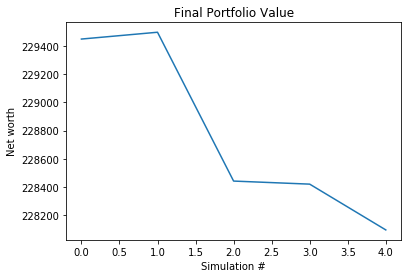

(228780.79174119877, 580.81656428011365)

In [31]:
actions = ['Buy', 'Sell', 'Hold']
hist = 3
policy = QLearningDecisionPolicy(actions, hist + 2)
budget = 100000.0
num_stocks = 0
run_simulations(policy, budget, num_stocks, prices, hist)